In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## The Binomial Distribution ##

Let $X_1, X_2, \ldots , X_n$ be i.i.d. Bernoulli $(p)$ random variables and let $S_n = X_1 + X_2 \ldots + X_n$. That's a formal way of saying:
- Suppose you have a fixed number $n$ of success/failure trials; and
- the trials are independent; and
- on each trial, the probability of success is $p$.
- Let $S_n$ be the total number of successes.

The first goal of this section is to find the distribution of $S_n$. 

In our [earlier example](http://prob140.org/textbook/content/Chapter_06/00_Random_Counts.html), we were counting the number of sixes in 7 rolls of a die. The 7 rolls are independent of each other, the chance of "success" (getting a six) is $1/6$ on each trial, and $S_7$ is the number of sixes.

The first step in finding the distribution of any random variable is to identify the possible values of the variable. In $n$ trials, the smallest number of successes you can have is 0 and the largest is $n$. So the set of possible values of $S_n$ is $\{0, 1, 2, \ldots , n\}$.

Thus the number of sixes in 7 rolls can be any integer in the 0 through 7 range. Let's find $P(S_7 = 3)$.

Partition the event $\{S_7 = 3\}$ into the different ways it can happen. One way can be denoted SSSFFFF, where S denotes "success" (or "six"), and F denotes failure. Another is SFFSSFF. And so on.

Now notice that 

$$
P(\text{SSSFFFF}) = 
\big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4
= P(\text{SFFSSFF})
$$

by independence. Indeed, any sequence of three S's and four F's has the same probability. So by the addition rule,

$$
\begin{align*}
P(S_7 = 3) &= \text{(number of sequences that have three S and four F)} \cdot \big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4 \\ \\
&= \binom{7}{3} \big{(}\frac{1}{6}\big{)}^3 \big{(}\frac{5}{6}\big{)}^4
\end{align*}
$$

because $\binom{7}{3}$ counts the number of ways you can choose 3 places out of 7 in which to put the symbol S, with the remaining 4 places being filled with F.

An analogous argument leads us to one of the most important distributions in probability theory.

### The Binomial $(n, p)$ Distribution ###
Let $S_n$ be the number of successes in $n$ independent Bernoulli $(p)$ trials. Then $S_n$ has the *binomial distribution with parameters $n$ and $p$*, defined by

$$
P(S_n = k) = \binom{n}{k} p^k (1-p)^{n-k}, ~~~ k = 0, 1, \ldots, n
$$

Parameters of a distribution are constants associated with it. The Bernoulli $(p)$ distribution has parameter $p$. The binomial distribution defined above has parameters $n$ and $p$ and is referred to as the binomial $(n, p)$ distribution for short. You should check that the Bernoulli $(p)$ distribution is the same as the binomial $(1, p)$ distribution.

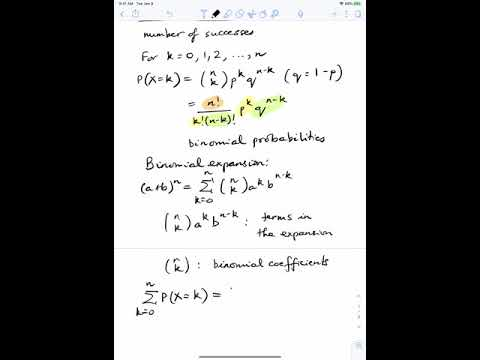

In [2]:
# VIDEO: Binomial Distribution
from IPython.display import YouTubeVideo

YouTubeVideo("K2Rsnx8YbJQ")

Before we get going on calculations with the binomial distribution, let's make a few observations.

- The functional form of the probabilities is symmetric in successes and failures, because

$$
P(S_n = k) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}, ~~~ k = 0, 1, \ldots, n
$$

That's "number of trials factorial; divided by number of successes factorial times number of failures factorial; times the probability of success to the power number of successes; times the probability of failure to the power number of failures."

- The formula makes sense for the edge cases $k=0$ and $k=n$. We can calculate $P(S_n = 0)$ without any of the machinery developed above. It's the chance of no successes, which is the chance of all failures, which is $(1-p)^n$. Our formula says

$$
P(S_n = 0) = \frac{n!}{0!(n-0)!} p^0 (1-p)^{n-0} = (1-p)^n
$$

after all the dust clears in the formula; the first two factors are both 1. You can check that $P(S_n = n) = p^n$, the
chance that all the trials are successes.

Remember that $0! = 1$ by definition. In part, it is defined that way to make the formula for $\binom{n}{k}$ work out correctly when $k=0$. 

- The probabilities in the distribution sum to 1. To see this, recall that for any two numbers $a$ and $b$,

$$
\begin{align*}
(a+b)^2 &= a^2 + 2ab + b^2 \\
(a+b)^3 &= a^3 + 3a^2b + 3ab^2 + b^3 \\
\ldots \\
(a+b)^n &= \sum_{k=0}^n \binom{n}{k} a^k b^{n-k}
\end{align*}
$$

by the *binomial expansion* of $(a+b)^n$. The numbers $\binom{n}{k}$ are the elements of Pascal's triangle, as you will have seen in a math class, and are called *binomial coefficients*.

Plug in $a = p$ and $b = 1-p$ and notice that the terms in the sum are exactly the binomial probabilities we defined above. So the sum of the probabilities is

$$
\sum_{k=0}^n \binom{n}{k} p^k (1-p)^{n-k}
~ = ~ \big{(} p + (1-p) \big{)}^n ~ = ~ 1^n ~ = ~ 1
$$

### Applying the Formula ###

To use the binomial formula, you first have to recognize that it can be used, and then use it as you would use any distribution.

- Check the conditions: a known number of independent, repeated, success/failure trials, and you are counting the number of successes
- Identify the two parameters $n$ and $p$
- Identify each $k$ for which the event occurs
- Add up the binomial $(n, p)$ probabilities for all $k$ in the set you identified (or, if the set is very large, add up the probabilities in the complement and then subtract from 1)

```{admonition} Quick Check
Every time I throw a dart, I have chance 25% of hitting the bullseye, independent of all other throws. Suppose I throw the dart 10 times. Find the chance that

(a) I hit the bullseye two times

(b) I hit the bullseye more than two times

(c) I hit the bullseye more than six times

```

```{admonition} Answer
:class: dropdown
(a) $\binom{10}{2} 0.25^2 0.75^8$

(b) $1 - \sum_{k=0}^{2} \binom{10}{k} 0.25^k 0.75^{10-k}$

(c) $\sum_{k=7}^{10} \binom{10}{k} 0.25^k 0.75^{10-k}$

```

### Binomial Probabilities in Python ###
`SciPy` is a system for scientific computing, based on Python. The `stats` submodule of `scipy` does numerous calculations in probability and statistics. We will be importing it at the start of every notebook from now on.

In [3]:
from scipy import stats

The function `stats.binom.pmf` takes three arguments: $k$, $n$, and $p$, in that order. It returns the numerical value of $P(S_n = k)$ For short, we will say that the function returns the binomial $(n, p)$ probability of $k$.

The acronym "pmf" stands for *probability mass function* which as we have noted earlier is sometimes used as another name for the distribution of a variable that has finitely many values.

The chance of 3 sixes in 7 rolls of a die is
$\binom{7}{3}(1/6)^3(5/6)^4$ by the binomial formula, which works out to about 8% by the calculation below.

In [4]:
stats.binom.pmf(3, 7, 1/6)

0.07814286122542301

You can also specify an array or list of values of $k$, and `stats.binom.pmf` will return an array consisting of all their probabilities.

In [5]:
stats.binom.pmf([2, 3, 4], 7, 1/6)

array([0.23442858, 0.07814286, 0.01562857])

Thus to find $P(2 \le S_7 \le 4)$, you can use

In [6]:
sum(stats.binom.pmf([2, 3, 4], 7, 1/6))

0.3282000171467764

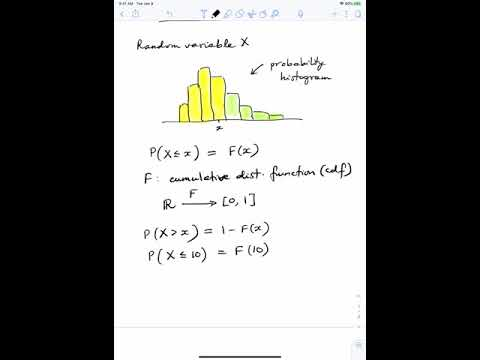

In [7]:
# VIDEO: CDF
YouTubeVideo('MoBXF8icYkM')

### Cumulative Distribution Function (cdf) ###

To visualize binomial distributions we will use the `prob140` method `Plot`, by first using `stats.binom.pmf` to calculate the binomial probabilities. The cell below plots the distribution of $S_7$ above. Notice how we start by specifying all the possible values of $S_7$ in the array `k`.

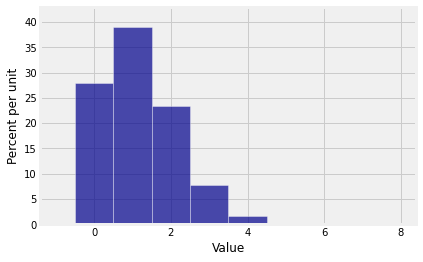

In [8]:
n = 7
p = 1/6
k = np.arange(n+1)
binom_7_1_6 = stats.binom.pmf(k, n, p)
binom_7_1_6_dist = Table().values(k).probabilities(binom_7_1_6)
Plot(binom_7_1_6_dist)

Very often, we need probabilities of the form $P(X > x)$ or $P(X \le x)$. For example, for $X$ with the binomial $(7, 1/6)$ distribution above, here is the event $\{ X \le 2 \}$.

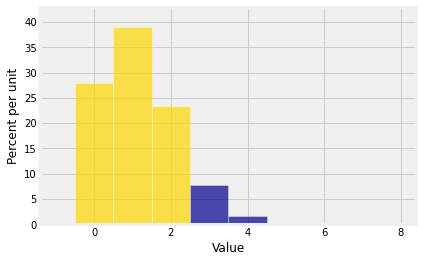

In [9]:
Plot(binom_7_1_6_dist, event=np.arange(0, 3))

The *cumulative distribution function* or c.d.f. of any random variable is a function that calculates this "area to the left" of any point. If you denote the c.d.f. by $F$, then
$$
F(x) = P(X \le x)
$$
for any x. 

We will get to know this function better later in the course. For now, note that `stats` lets you calculate it directly without having to use `pmf` and then summing. The function is called `stats.distribution_name.cdf` where `distribution_name` could be `binom` or `hypergeom` or any other distribution name that `stats` recognizes. The first argument is $x$, followed by the parameters of the distribution in a specified order. 

For $X$ a binomial $(7, 1/6)$ random variable, the gold area above is $F(2)$ which is about 90.4%.

To find $P(X > 2)$, we can use the cdf again:

$$
P(X > 2) ~ = ~ 1 - P(X \le 2) ~ = ~ 1 - F(2)
$$

In [10]:
1 - stats.binom.cdf(2, 7, 1/6)

0.09577546296296302

In [11]:
stats.binom.cdf(2, 7, 1/6)

0.904224537037037

Here is the event $P(5 < Y \le 10)$ for a random variable $Y$ that has the binomial $(20, 0.4)$ distribution.

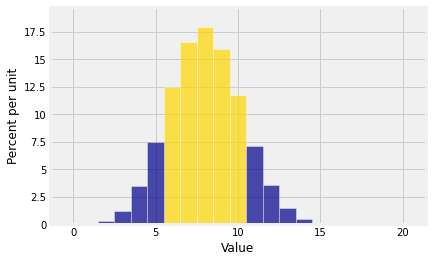

In [12]:
k = np.arange(21)
probs = stats.binom.pmf(k, 20, 0.4)
binom_20_point4 = Table().values(k).probabilities(probs)
Plot(binom_20_point4, event=np.arange(6, 11))

To find $P(5 < Y \le 10)$ we can sum the areas of the gold bars. But we can also use the cdf:

$$
P(5 < Y \le 10) ~ = ~ P(Y \le 10) - P(Y \le 5)
$$

That's about 74.7%.

In [13]:
stats.binom.cdf(10, 20, 0.4) - stats.binom.cdf(5, 20, 0.4)

0.7468797811297458

### Binomial Histograms ###

Here is the histogram of the binomial $(7, 1/6)$ distribution again. Not surprisingly, the graph shows that in 7 rolls of a die you are most likely to get around 1 six.

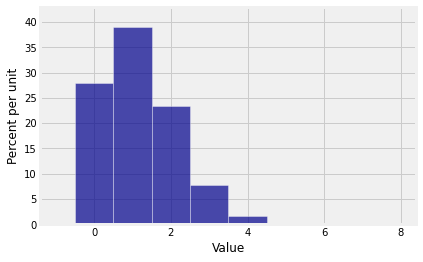

In [14]:
Plot(binom_7_1_6_dist)

This distribution is not symmetric, as you would expect. But something interesting happens to the distribution of the number of sixes when you increase the number of rolls.

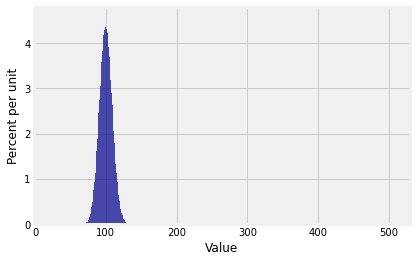

In [15]:
n = 600
p = 1/6
k = np.arange(n+1)
binom_600_1_6 = stats.binom.pmf(k, n, p)
binom_600_1_6_dist = Table().values(k).probabilities(binom_600_1_6)
Plot(binom_600_1_6_dist)

This distribution is close to symmetric, even though the die has only a 1/6 chance of showing a six.

Also notice that while the the *possible* values of the number of sixes range from 0 to 600, the *probable* values are in a much smaller range. The `plt.xlim` function allows us to zoom in on the probable values. The semicolon is just to prevent Python giving us a message that clutters up the graph. The `edges=True` option forces `Plot` to draw lines separating the bars; by default, it stops doing that if the number of bars is large.

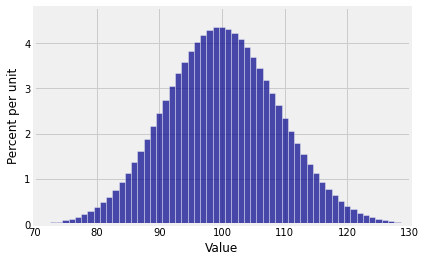

In [16]:
Plot(binom_600_1_6_dist, edges=True)
plt.xlim(70, 130);

But the binomial $(n, p)$ distribution doesn't always look bell shaped if $n$ is large.

Something quite different happens if for example your random variable is the number of successes in 600 independent trials that have probability 1/600 of success on each trial. Then the distribution of the number of successes is binomial $(600, 1/600)$, which looks like this:

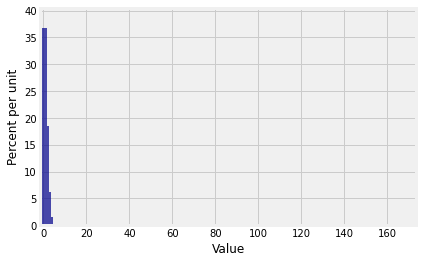

In [17]:
n = 600
p = 1/600
k = np.arange(n+1)
binom_600_1_600 = stats.binom.pmf(k, n, p)
binom_600_1_600_dist = Table().values(k).probabilities(binom_600_1_600)
Plot(binom_600_1_600_dist)

We really can't see that at all! Let's zoom in. When we set the limits on the horizontal axis, we have to account for the bar at 0 being centered at the 0 and hence starting at -0.5.

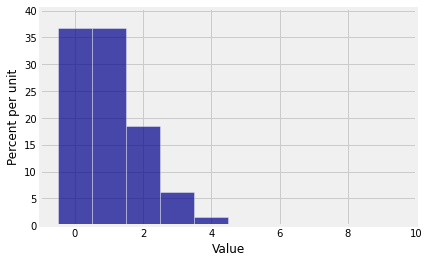

In [18]:
Plot(binom_600_1_600_dist, edges=True)
plt.xlim(-1, 10);

Now you can see that in 600 independent trials with probability 1/600 of success on each trial, you are most likely to get no successes or 1 success. There is some chance that you get 2 through 4 successes, but the chance of any number of successes greater than 4 is barely visible on the scale of the graph.

Clearly, the shape of the histogram is determined by both $n$ and $p$. We will study the shape carefully in an upcoming section. But first let's see some numerical examples of using the binomial distribution.